In [44]:
# from xml.dom import minidom
from pycitylayers.client import Client
from pycitylayers.utils import PointGQL, PolygonGQL
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from shapely.geometry import Polygon, Point, MultiPolygon
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

via minidom

In [3]:
# file=minidom.parse(r"C:\Users\msham\OneDrive - Concordia University - Canada\Winter 2023\obXML V1.3.3 Release\example\obXML_v1.3.3.xml")
# file.getElementsByTagName('Buildings')
# file.getElementsByTagName('Occupants')

# better package for XML is ET, below

In [2]:
import xml.etree.ElementTree as ET

In [3]:
tree = ET.parse(r"C:\Users\msham\OneDrive - Concordia University - Canada\Winter 2023\obXML V1.3.3 Release\example\obXML_v1.3.3.xml")
root = tree.getroot()

In [78]:
for i in range(len(root[2])):
    print("tag:",root[2][i].tag)
    print("attrib:",root[2][i].attrib)
    print("attrib.keys:",root[2][i].attrib.keys())
    print("attrib.values:",root[2][i].attrib.values())

tag: MovementBehavior
attrib: {'ID': 'B_M_Researcher'}
attrib.keys: dict_keys(['ID'])
attrib.values: dict_values(['B_M_Researcher'])
tag: MovementBehavior
attrib: {'ID': 'B_M_Manager'}
attrib.keys: dict_keys(['ID'])
attrib.values: dict_values(['B_M_Manager'])
tag: MovementBehavior
attrib: {'ID': 'B_M_Admin'}
attrib.keys: dict_keys(['ID'])
attrib.values: dict_values(['B_M_Admin'])
tag: Behavior
attrib: {'ID': 'B_Light_Hunt_1980_Logit_1D_Quadratic'}
attrib.keys: dict_keys(['ID'])
attrib.values: dict_values(['B_Light_Hunt_1980_Logit_1D_Quadratic'])
tag: Behavior
attrib: {'ID': 'B_Window_Yun_et_al_2008_logit_2D_Tin_Tout'}
attrib.keys: dict_keys(['ID'])
attrib.values: dict_values(['B_Window_Yun_et_al_2008_logit_2D_Tin_Tout'])
tag: Behavior
attrib: {'ID': 'B_L1'}
attrib.keys: dict_keys(['ID'])
attrib.values: dict_values(['B_L1'])
tag: Behavior
attrib: {'ID': 'B_L2'}
attrib.keys: dict_keys(['ID'])
attrib.values: dict_values(['B_L2'])
tag: Behavior
attrib: {'ID': 'B_L3'}
attrib.keys: dict_keys

In [86]:
for i in range(len(root[2][0])):
    print("tag:",root[2][0][i].tag)
    print("text:",root[2][0][i].text)
    # print("attrib.keys:",root[2][0][i].attrib.keys())
    # print("attrib.values:",root[2][0][i].attrib.values())

tag: Description
text: Researcher and senior 70% own office and 5% other office
tag: SeasonType
text: All
tag: DayofWeek
text: Weekdays
tag: RandomMovementEvent
text: 
				
tag: StatusTransitionEvent
text: 
				
tag: StatusTransitionEvent
text: 
				
tag: StatusTransitionEvent
text: 
				


In [98]:
movement_behavior=[]
other_behavior=[]
for i, temp_item in enumerate(root[2]):
    # print(temp_item.tag)
    if "Move" in temp_item.tag:
        movement_behavior.append(temp_item)
    elif "Behavior" in temp_item.tag:
        other_behavior.append(temp_item)

In [108]:
for i in range(len(movement_behavior)):
    print(movement_behavior[i].attrib)

{'ID': 'B_M_Researcher'}
{'ID': 'B_M_Manager'}
{'ID': 'B_M_Admin'}


In [179]:
len(movement_behavior[0])
movement_behavior[0][0]

<Element 'Description' at 0x00000168E88B8270>

In [137]:
for i in range(len(other_behavior)):
    print(other_behavior[i].tag)
    # print(other_behavior[i].text)
    print(other_behavior[i].attrib)
    for j in range(len(other_behavior[i])):

        print("*",other_behavior[i][j])
        print("**",other_behavior[i][j].tag,len(other_behavior[i][j]))
        for k in range(len(other_behavior[i][j])):
            print(other_behavior[i][j][k].tag,other_behavior[i][j][k],"len:",len(other_behavior[i][j][k]))
            for l in range(len(other_behavior[i][j][k])):
                print(other_behavior[i][j][k][l].tag," :",len((other_behavior[i][j][k][l])))
                for m in range(len((other_behavior[i][j][k][l]))):
                    print(other_behavior[i][j][k][l][m].tag," :",len((other_behavior[i][j][k][l][m])))

            
    if i==0:
        break


Behavior
{'ID': 'B_Light_Hunt_1980_Logit_1D_Quadratic'}
* <Element 'Description' at 0x00000168E88BBC90>
** Description 0
* <Element 'Drivers' at 0x00000168E88BBCE0>
** Drivers 2
Time <Element 'Time' at 0x00000168E88BBD30> len: 4
TimeofDay  : 0
TimeofDay  : 0
DayofWeek  : 0
SeasonType  : 0
Environment <Element 'Environment' at 0x00000168E88BBEC0> len: 1
Parameter  : 1
Type  : 0
* <Element 'Needs' at 0x00000168E88BBFB0>
** Needs 1
Physical <Element 'Physical' at 0x00000168E88CC040> len: 1
Visual  : 1
ParameterRange  : 2
* <Element 'Actions' at 0x00000168E88CC1D0>
** Actions 1
Interaction <Element 'Interaction' at 0x00000168E88CC220> len: 2
Type  : 0
Formula  : 1
Logit1DQuadratic  : 6
* <Element 'Systems' at 0x00000168E88CC590>
** Systems 1
Lights <Element 'Lights' at 0x00000168E88CC5E0> len: 1
LightType  : 0


In [92]:
root[2][3][0].text

'Dark Light based on the model in Hunt, D. R. G. Predicting artificial lighting use - a method based upon observed patterns of behaviour. Light. Res. Technol. (1980).'

In [180]:
root[2]

<Element 'Behaviors' at 0x00000168E88B8180>

In [ ]:
root[2][0].tag

In [169]:
children=[]
for child in root[2]:
    # print(child.tag, child.attrib)
    children.append(child)
    # print(child.attrib.values())
for i, beh in enumerate(children):
    # print(beh)
    # print(beh.attrib.values())
    if "B_L4" in beh.attrib.values():
        print(i,beh,beh.attrib.values())
        print(beh[2])
    # print(child.attrib.values())

8 <Element 'Behavior' at 0x00000168E88CE8E0> dict_values(['B_L4'])
<Element 'Needs' at 0x00000168E88CECA0>


In [150]:
for i, beh in enumerate(child.attrib.values()):
    if "B_W2" in beh:
        print(i,beh)

let's use the example XML from HONG et al. DNAS part 2 to populate occupants characteristics and behavior for a sample building

In [39]:
dic={}

for occupant in range(len(root[1])):
    temp={}
    tags=[]
    keys=[]
    values=[]
    for attribute in range(len(root[1][occupant])):
        tags.append(root[1][occupant][attribute].tag)
        values.append(root[1][occupant][attribute].text)

    newlist = []
    for i, v in enumerate(tags):
        totalcount = tags.count(v)
        count = tags[:i].count(v)
        newlist.append(v + str(count + 1) if totalcount > 1 else v)
    keys=newlist
    for i, key in enumerate(keys):
        temp[key]=values[i]

    dic[occupant]=temp  
    

In [26]:
client = Client().create(source='cerc')
coll = client.collection
print("Data collection acquired")


Fetching Metadata. Please Wait ...
Data collection acquired


---------- Table:0 ----------
Name:		building_lots 
Description:	 
Format:		CSV 

selecting 17 buildings in 33 m radius of point -73.570552324815,45.530402345761175


,borough_id,building_number,built_area,dwelling_number,firstletter_apt,geom,index,land_area,landuse_code,landuse_text,lastletter_apt,max_floors,municipality_code,nad83_registration,street_name,street_number,uid,unit_category,unit_number,year_built
0,REM21,4218,454,1,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",4602,52,1000,Logement,0,1,50,9943-34-1120-6-001-0004,avenue Papineau (MTL),4218,5011916,Condominium,0,1910
1,REM21,4235,219,3,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",21512,284,1000,Logement,0,2,50,9943-23-5995-0-000-0000,rue Marquette (MTL),4235,1030537,Régulier,0,1885
2,REM21,1651,466,2,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",23781,259,1000,Logement,0,3,50,9943-33-0449-2-000-0000,rue Rachel Est (MTL),1653,1033777,Régulier,0,1915
3,REM21,4227,610,1,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",24650,92,1000,Logement,0,1,50,9943-23-6590-8-001-0003,rue Marquette (MTL),4227,1097440,Condominium,0,1900
4,REM21,1681,125,2,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",24665,116,1000,Logement,0,2,50,9943-24-9603-4-000-0000,avenue Bureau (MTL),1683,1118335,Régulier,0,1910


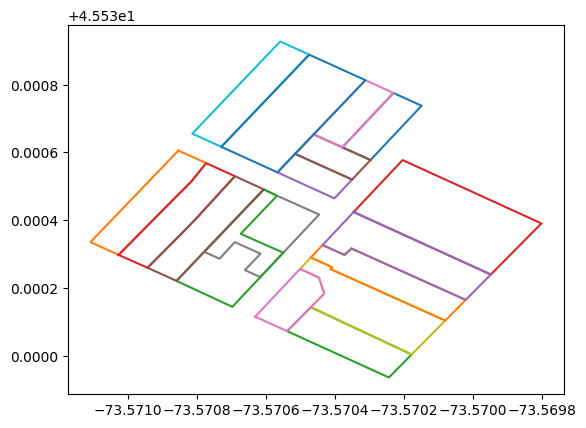

In [27]:
tb=coll[6][0]
print(tb)
query_point_x,query_point_y="-73.570552324815","45.530402345761175"
query_radius=0.0003
query_geometry = PointGQL().point(-73.570552324815,45.530402345761175)


query_options = {
    # 'columns': ['index', 'built_area', 'geom', 'year_built'], 
    'nrows': 10000, 
    'skiprows': 0,
    'geometry_operation': 'distance_from_point',
    'geom_distance': query_radius,
    'geometry': query_geometry,
    'crs_epsg': 4326,
}

data_building_lots = tb.query_simple( **query_options )
print("selecting {} buildings in {} m radius of point {},{}".format(len(data_building_lots),round(query_radius*111100),query_point_x,query_point_y))
display(data_building_lots.head())

for i in range(len(data_building_lots)):
    vertex = data_building_lots.iloc[i,:]["geom"]["coordinates"][0]
    polygon1=Polygon(vertex)
    plt.plot(*polygon1.exterior.xy)

17 buildings imported


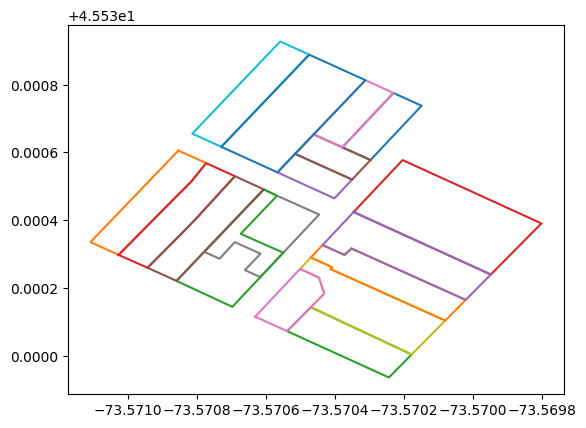

# centroids: 17
# polygons: 17
Number of nodes: 17


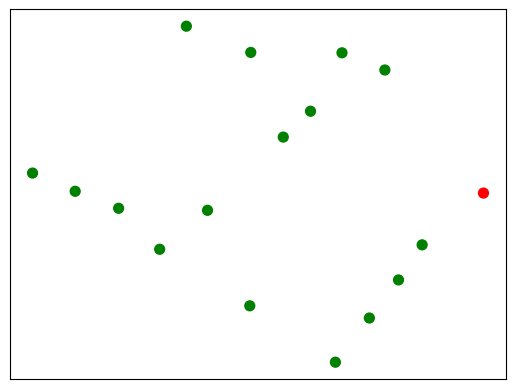

In [28]:
# import the class and create an instance of it:
import Semantic_graph as sg
Occ=sg.semantic_graph()
# feed data:
Occ.init_data(data_building_lots)
#create the semantic graph:
graph=Occ.create_graph(show_edges=False)

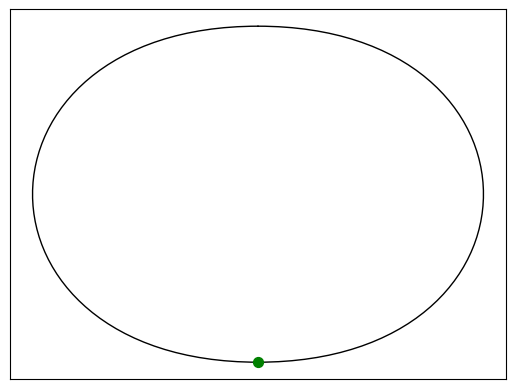

In [47]:
Occ.plot_graph()

In [182]:
import mesa
import random
# import TUS analysis class:
import TUS_analysis as TUS

class Agent(mesa.Agent):
    """An agent with fixed home and occupancy profile."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.home=unique_id
        self.timer=0
        self.is_home=1
        # select a random TUS ID and assign the corresponding profile
        self.PUMFID=random.choice(model.profiles.columns)
        self.profile=list(model.profiles[self.PUMFID])
        self.attr_no=random.choice(model.agent_char.columns)
        attr_therm=[]
        attr_light=[]
        attr_window=[]
        attr_AC=[]
        attr_PL=[]
        
        for behavior in model.agent_char[self.attr_no].values:
            # print(behavior[0])
            item=str(behavior)
            if "_Therm" in item:
                attr_therm.append(item)
            elif "_PL" in item:
                attr_PL.append(item)
            elif "_AC" in item:
                attr_AC.append(item)
            elif "_L" in item:
                attr_light.append(item)
            elif "_W" in item:
                attr_window.append(item)
        
        self.attr_therm=attr_therm
        self.attr_light=attr_light
        self.attr_window=attr_window
        self.attr_AC=attr_AC
        self.attr_PL=attr_PL
        
        self.need_thermal=[]
        self.need_visual=[]
        self.need_acoustic=[]
        self.need_IAQ=[]

        self.action=model.agent_char[self.attr_no]
        # self.gender=model.agent_char[random.choice(model.agent_char.columns)]["Gender"]
        # for i, attr in enumerate(model.agent_char.index):
        #     self.attr=model.agent_char[self.attr_no][attr]
        # gather a list of non-residential buildings as potential movement choices when not at home        
        self.non_res=model.non_res
    
    # action 1: leave home
    def move_out(self):
        new_position = random.choice(self.non_res)[0]
        self.model.grid.move_agent(self, new_position)
        self.is_home=0

    # action 2: go home
    def go_home(self):
        self.model.grid.move_agent(self, self.home)
        self.is_home=1
    
    # lighting behavior
    def light_on(self):
        self.light=1
    
    def light_off(self):
        self.light=0
    

    def step(self):
        """ Define the movement of agents, based on their profiles"""
        # looking at the specific profile of the agent previously assigned, and the time (minute of the day), agent decides if moves home or not. (1 means in home)

        if list(self.profile)[self.timer % 1440]==1:
            self.go_home()
        else:
            self.move_out()

        
        ### Other behavior meant to add randomness in behavior - commented for now

        # if (self.timer % 24)<17:
        #     if self.pos==self.home:
        #         if random.randint(0,10)>5:
        #             self.move_out()
        #     else:
        #         if random.randint(0,10)>5:
        #             self.go_home()


        # if (self.timer % 24)>17:
        #     if self.pos==self.home:
        #         if random.randint(0,10)>5:
        #             self.move_out()
        #     else:
        #         if random.randint(0,10)>5:
        #             self.go_home()

        

        # time progresses:
        self.timer += 1

        
        # For demonstration purposes we will print the agent's unique_id, their assigned home ID (both should be the same), if at home, current location, and time
        # commented out due to lengthy output
        # print("Agent #" + str(self.unique_id) + ", home is:"+str(self.home)+",is home:"+str(self.is_home)+", currently at:"+str(self.pos)+", time is: "+str(self.timer))


class Model(mesa.Model):
    """A model with some number of agents."""
    # the graph that was previously created will be treated as input for the model. The number of residential nodes dictate number of agents, and non-residentials are potential nodes to be moved to when not at home.
    
    def __init__(self, Grid):
        self.Residentials = [(x,y) for x,y in Grid.nodes(data=True) if y['landuse_code']==1000]
        self.non_res=[(x,y) for x,y in Grid.nodes(data=True) if y['landuse_code']!=1000]

        self.num_agents = len(self.Residentials)
        print("# of residential buildings:",len(self.Residentials))
        self.profiles= TUS.TUS_agents().occupancy_profiles(self.num_agents)[0]
        print("Profiles extracted")

        # Add DNAS components

        self.agent_char=pd.DataFrame(dic)
        self.movement_behavior=movement_behavior
        self.other_behavior=other_behavior


        self.grid = mesa.space.NetworkGrid(Grid)
        self.schedule = mesa.time.RandomActivation(self)
        self.running = True
        
        # Determine the residential "sub-graph"and  create agents based on it.

        Grid_residential=Grid.subgraph([x for x,y in Grid.nodes(data=True) if y['landuse_code']==1000])


        for i, node in enumerate(list(Grid_residential.nodes(data=True))):
            a = Agent(node[0], self)
            self.schedule.add(a)
            
            # Add the agent to their corresponding grid cell
            self.grid.place_agent(a,node[0])
            
        # define parameters to be reported
        self.datacollector = mesa.DataCollector(
              agent_reporters={"PUMFID":"PUMFID","profile":"profile","pos": "pos","timer":"timer","is_home":"is_home","action":"action","attr_therm":"attr_therm","attr_no":"attr_no"}#"Age":"Age","Gender":"Gender"}
        )

    def step(self):
        """Advance the model by one step."""
        self.datacollector.collect(self)
        self.schedule.step()

In [37]:
random.choice(model.agent_char.columns)

0

In [38]:
model.agent_char.columns

Int64Index([0], dtype='int64')

In [41]:
model = Model(graph)
# run it for one full day:

for i in range(1):
    model.step()

# of residential buildings: 16
Number of unique people available in the dataset: 679
Profiles extracted


In [42]:
display(pd.DataFrame(model.datacollector.get_agent_vars_dataframe()))

PUMFID                                            profile  \
Step AgentID                                                              
0    5011916   10015  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     1030537   10007  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     1033777   10007  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     1097440   10006  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     1118335   10005  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     1118336   10004  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     5004182   10002  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     5038018   10003  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
     5003397   10014  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     5016406   10013  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     5152313   10004  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     5152462   10006  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     5070903   10014  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     1033783   10010  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
     1030540   10003  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
     1030544   10000  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                  pos  timer  is_home  \
Step AgentID                            
0    5011916  5011916      0        1   
     1030537  1030537      0        1   
     1033777  1033777      0        1   
     1097440  1097440      0        1   
     1118335  1118335      0        1   
     1118336  1118336      0        1   
     5004182  5004182      0        1   
     5038018  5038018      0        1   
     5003397  5003397      0        1   
     5016406  5016406      0        1   
     5152313  5152313      0        1   
     5152462  5152462      0        1   
     5070903  5070903      0        1   
     1033783  1033783      0        1   
     1030540  1030540      0        1   
     1030544  1030544      0        1   

                                                         action  \
Step AgentID                                                      
0    5011916  Priority                          NaN
Age     ...   
     1030537  Priority                        2
Age         ...   
     1033777  Priority                          NaN
Age     ...   
     1097440  Priority                        2
Age         ...   
     1118335  Priority                          NaN
Age     ...   
     1118336  Priority                          NaN
Age     ...   
     5004182  Priority                         NaN
Age      ...   
     5038018  Priority                          NaN
Age     ...   
     5003397  Priority                         NaN
Age      ...   
     5016406  Priority                          NaN
Age     ...   
     5152313  Priority                          NaN
Age     ...   
     5152462  Priority                          NaN
Age     ...   
     5070903  Priority                          NaN
Age     ...   
     1033783  Priority                        3
Age         ...   
     1030540  Priority                          NaN
Age     ...   
     1030544  Priority                          NaN
Age     ...   

                                  attr_therm  attr_no  
Step AgentID                                           
0    5011916  [B_Therm1, B_Therm2, B_Therm3]       10  
     1030537  [B_Therm1, B_Therm2, B_Therm3]        6  
     1033777  [B_Therm1, B_Therm2, B_Therm3]        7  
     1097440  [B_Therm1, B_Therm2, B_Therm3]        6  
     1118335  [B_Therm1, B_Therm2, B_Therm3]       14  
     1118336  [B_Therm1, B_Therm2, B_Therm3]       10  
     5004182  [B_Therm1, B_Therm2, B_Therm3]       11  
     5038018  [B_Therm1, B_Therm2, B_Therm3]        8  
     5003397  [B_Therm1, B_Therm2, B_Therm3]       11  
     5016406  [B_Therm1, B_Therm2, B_Therm3]        1  
     5152313  [B_Therm1, B_Therm2, B_Therm3] 

In [43]:
pd.DataFrame(dic)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Priority,3,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,56,40,35,40,32,45,48,21,22,22,21,34,35,36,24,25
Gender,Male,Female,Male,Male,Female,Male,Male,Male,Male,Female,Female,Female,Male,Male,Female,Female
LifeStyle,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm
JobType,Researcher,NaN,Researcher,NaN,Researcher,Manager,Manager,Researcher,Researcher,Researcher,Researcher,Researcher,Researcher,Researcher,Administrator,Administrator
MovementBehaviorID,B_M_Manager,B_M_Admin,B_M_Researcher,B_M_Researcher,B_M_Researcher,B_M_Manager,B_M_Manager,B_M_Researcher,B_M_Researcher,B_M_Researcher,B_M_Researcher,B_M_Researcher,B_M_Researcher,B_M_Researcher,B_M_Admin,B_M_Admin
BehaviorID1,B_L4,B_L1,B_L1,B_L1,B_L1,B_L4,B_L4,B_L1,B_L1,B_L1,B_L1,B_L4,B_L4,B_L4,B_L1,B_L1
BehaviorID2,B_L5,B_L2,B_L2,B_L2,B_L2,B_L5,B_L5,B_L2,B_L2,B_L2,B_L2,B_L5,B_L5,B_L5,B_L2,B_L2
BehaviorID3,B_L6,B_L3,B_L3,B_L3,B_L3,B_L6,B_L6,B_L3,B_L3,B_L3,B_L3,B_L6,B_L6,B_L6,B_L3,B_L3
BehaviorID4,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1,B_PL1


In [18]:
temp_1=pd.DataFrame(model.datacollector.get_agent_vars_dataframe()["action"])
temp_1

action
Step AgentID                                                   
0    5011916  Priority                          NaN
Age     ...
     1030537  Priority                        2
Age         ...
     1033777  Priority                          NaN
Age     ...
     1097440  Priority                        3
Age         ...
     1118335  Priority                         NaN
Age      ...
     1118336  Priority                          NaN
Age     ...
     5004182  Priority                          NaN
Age     ...
     5038018  Priority                          NaN
Age     ...
     5003397  Priority                          NaN
Age     ...
     5016406  Priority                         NaN
Age      ...
     5152313  Priority                          NaN
Age     ...
     5152462  Priority                          NaN
Age     ...
     5070903  Priority                          NaN
Age     ...
     1033783  Priority                        2
Age         ...
     1030540  Priority                          NaN
Age     ...
     1030544  Priority                          NaN
Age     ...

In [19]:
attributes_temp=pd.DataFrame(temp_1.xs(0, level="Step").loc[5011916,:][0])
attributes_temp

,14
Priority,NaN
Age,24
Gender,Female
LifeStyle,Norm
JobType,Administrator
MovementBehaviorID,B_M_Admin
BehaviorID,B_L1
BehaviorID1,B_L1
BehaviorID2,B_L2
BehaviorID3,B_L3


In [33]:
ID=random.choice(pd.DataFrame(dic).columns)
dic[ID].values()

dict_values(['21', 'Male', 'Norm', 'Researcher', 'B_M_Researcher', 'B_L1', 'B_L1', 'B_L2', 'B_L3', 'B_PL1', 'B_Therm1', 'B_Therm2', 'B_Therm3', 'B_AC1', 'B_AC2', 'B_AC3', 'B_AC4', 'B_W1', 'B_W2', 'B_W3_Rain_close'])

In [38]:
attr_therm=[]
attr_light=[]
attr_window=[]
attr_AC=[]
attr_PL=[]
for behavior in dic[ID].values():
    # print(behavior[0])
    item=str(behavior)
    if "_Therm" in item:
        attr_therm.append(item)
    elif "_PL" in item:
        attr_PL.append(item)
    elif "_AC" in item:
        attr_AC.append(item)
    elif "_L" in item:
        attr_light.append(item)
    elif "_W" in item:
        attr_window.append(item)

In [39]:
attr_light

['B_L1', 'B_L1', 'B_L2', 'B_L3']

In [40]:
attr_window

['B_W1', 'B_W2', 'B_W3_Rain_close']

In [12]:
attr_therm=[]
attr_light=[]
attr_window=[]
attr_AC=[]
attr_PL=[]
for behavior in attributes_temp.values:
    # print(behavior[0])
    item=str(behavior[0])
    if "_Therm" in item:
        attr_therm.append(item)
    elif "_PL" in item:
        attr_PL.append(item)
    elif "_AC" in item:
        attr_AC.append(item)
    elif "_L" in item:
        attr_light.append(item)
    elif "_W" in item:
        attr_window.append(item)

NameError: name 'attributes_temp' is not defined

In [25]:
attr_therm

['B_Therm1', 'B_Therm2', 'B_Therm3']

In [26]:
attr_light

['B_L1', 'B_L1', 'B_L2', 'B_L3']

In [27]:
attr_window

['B_W1', 'B_W2', 'B_W3_Rain_close']

In [28]:
attr_AC

['B_AC1', 'B_AC2', 'B_AC3', 'B_AC4']

In [29]:
attr_PL

['B_PL1']

In [114]:
attributes_temp.values[13][0].contains("Therm")

AttributeError: 'str' object has no attribute 'contains'

In [ ]:
for i in

In [122]:
"Therm" in attributes_temp.values[13][0]

True

In [86]:
pd.Series(temp_list)

0    Priority                         NaN
Age      ...
dtype: object

In [82]:
" ".join(temp_list).split(" ")

TypeError: sequence item 0: expected str instance, Series found

In [83]:
[animal for word in temp_list for animal in word.split(' ')]

AttributeError: 'Series' object has no attribute 'split'

In [69]:
list(temp_1.xs(0, level="Step")["action"])

[Priority                         NaN
 Age                               36
 Gender                          Male
 LifeStyle                       Norm
 JobType                   Researcher
 MovementBehaviorID    B_M_Researcher
 BehaviorID                      B_L4
 BehaviorID1                     B_L4
 BehaviorID2                     B_L5
 BehaviorID3                     B_L6
 BehaviorID4                    B_PL1
 BehaviorID5                    B_PL2
 BehaviorID6                 B_Therm1
 BehaviorID7                 B_Therm2
 BehaviorID8                 B_Therm3
 BehaviorID9                    B_AC5
 BehaviorID10                   B_AC6
 BehaviorID11                   B_AC7
 BehaviorID12                    B_W1
 BehaviorID13                    B_W2
 BehaviorID14                     NaN
 Name: 13, dtype: object,
 Priority                          NaN
 Age                                22
 Gender                           Male
 LifeStyle                        Norm
 JobType            

In [44]:
temp_1

action
Step AgentID                                                   
0    5011916  Priority                         NaN
Age      ...
     1030537  Priority                          NaN
Age     ...
     1033777  Priority                         NaN
Age      ...
     1097440  Priority                        2
Age         ...
     1118335  Priority                          NaN
Age     ...
     1118336  Priority                         NaN
Age      ...
     5004182  Priority                        2
Age         ...
     5038018  Priority                        3
Age         ...
     5003397  Priority                          NaN
Age     ...
     5016406  Priority                          NaN
Age     ...
     5152313  Priority                          NaN
Age     ...
     5152462  Priority                          NaN
Age     ...
     5070903  Priority                          NaN
Age     ...
     1033783  Priority                          NaN
Age     ...
     1030540  Priority                          NaN
Age     ...
     1030544  Priority                          NaN
Age     ...